In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

subjects=[25,27]
bands=[-1,0,1,2] 
sessions=list(range(1,3))
spaces=['electrodeSpace','fontSpace']
band_dic={-1: 'noFilter', 0:'alpha',1:'beta',2:'gamma'} 
fmt_grph = 'png'
cmapcolours = ['blue','green','orange','red']
dimensions=['zero','one']
feat_vect_names=['Landscapes','Silhouettes','Descriptors','Bottleneck']
names=[]
for band in band_dic.values():
    names.append(band+'1')
    names.append(band+'2')

In [42]:
subj_n=0
total_trials=0
for subj in subjects:
    for space in spaces:
        test_size_subj=pd.read_csv('results/intensities/subject_'+str(subj)+'/'+space+'/subject_table.csv')['test size']
        end_table=np.zeros((4,2))
        for i,b in enumerate(bands):
            band=band_dic[b]
            temp1=pd.read_csv('results/intensities/subject_'+str(subj)+'/'+space+'/'+band+'/session'+str(1)+'/random_preds.csv',index_col=0)
            temp2=pd.read_csv('results/intensities/subject_'+str(subj)+'/'+space+'/'+band+'/session'+str(2)+'/random_preds.csv',index_col=0)
            test_size_1=test_size_subj[i*2]
            test_size_2=test_size_subj[i*2+1]
            end_table+=np.array(temp1)*test_size_1
            end_table+=np.array(temp2)*test_size_2
            total_trials+=test_size_1
            total_trials+=test_size_2
        end_table/=total_trials
        table=pd.DataFrame(end_table,index=temp1.index,columns=temp1.columns)
        table.to_csv(space+'end_random_rable'+str(subj)+'.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

subjects=[25,27]
bands=[2] 
sessions=list(range(1,2))
spaces=['electrodeSpace',]
band_dic={-1: 'noFilter', 0:'alpha',1:'beta',2:'gamma'} 
fmt_grph = 'png'
cmapcolours = ['blue','green','orange','red']
dimensions=['zero','one']
feat_vect_names=['LS','SH','D','BN']
names=[]

25
electrodeSpace
band 2
0 0
1 0
27
electrodeSpace
band 2
0 1
1 1


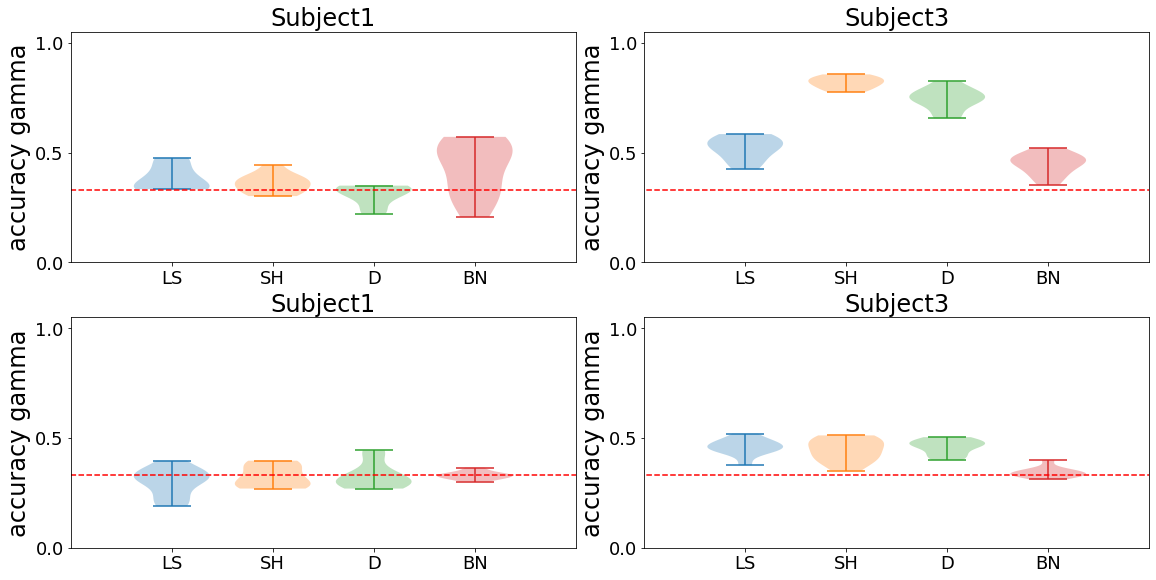

In [17]:
subj_n=0
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
for subj in subjects:
    print(subj)
    for space in spaces:
        print(space)
        for b in bands:
            print('band',b)
            
            band=band_dic[b]
            temp1=np.load('results/intensities/subject_'+str(subj)+'/'+space+'/'+band+'/session'+str(1)+'/topological_clf/'+band+'perf_intensity.npy')
        
            plt.rcParams['xtick.labelsize']=24
            for i_dim in range(2): 
        # the chance level is defined as the trivial classifier that predicts the label with more occurrences 
                print(i_dim,subj_n)
                chance_level=0.33
                axes[i_dim][subj_n].violinplot(temp1[i_dim,0,:],positions=[-0.2],widths=[0.3])
                axes[i_dim][subj_n].violinplot(temp1[i_dim,1,:],positions=[0.2],widths=[0.3])
                axes[i_dim][subj_n].violinplot(temp1[i_dim,2,:],positions=[0.6],widths=[0.3])
                axes[i_dim][subj_n].violinplot(temp1[i_dim,3,:],positions=[1],widths=[0.3])

                axes[i_dim][subj_n].plot([-1,2],[chance_level]*2,'--r')
                axes[i_dim][subj_n].axis(xmin=-0.6,xmax=1.4,ymin=0,ymax=1.05)
                axes[i_dim][subj_n].set_ylabel('accuracy '+band,fontsize=24)
                axes[i_dim][subj_n].set_title('Subject'+str(subj-24),fontsize=24)
                plt.setp(axes, xticks=[-0.2, 0.2, 0.6,1], yticks=[0,0.5,1] ,xticklabels=feat_vect_names)
            subj_n+=1
                
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18
fig.tight_layout(pad=0.5)             
plt.savefig('results/'+space+band+'2527.jpg')

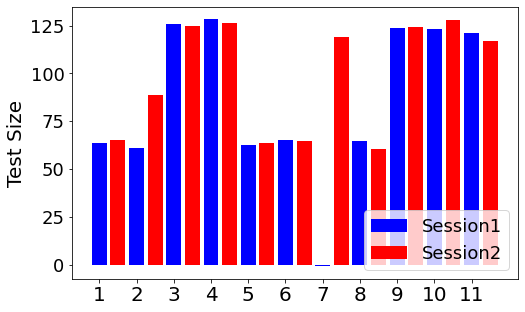

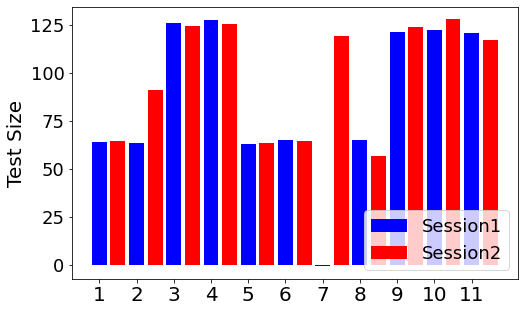

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import savemat
plt.rcParams["figure.figsize"] = (8,5)
subjects=list(range(25,36)) 
bands=[-1,0,1,2] 
sessions=list(range(1,3))
spaces=['electrodeSpace','fontSpace']
band_dic={-1: 'noFilter', 0:'alpha',1:'beta',2:'gamma'} 
fmt_grph = 'png'
cmapcolours = ['blue','green','orange','red']
names=[]
for band in band_dic.values():
    names.append(band+'1')
    names.append(band+'2')
ind = np.arange(22)
for space in spaces:
    plt.rcParams['xtick.labelsize']=20
    plt.rcParams['ytick.labelsize']=18
    for subj in subjects:       
        test_size_subj=pd.read_csv('results/intensities/subject_'+str(subj)+'/'+space+'/subject_table.csv')['test size']
        test_size_1_mean=test_size_subj[0:-1:2].mean()
        test_size_2_mean=test_size_subj[1:8:2].mean()
        
        savemat('Fig8/testsizes/subject_'+str(subj-24)+'test_size_mean_ses1', {'test_size': test_size_1_mean})
        savemat('Fig8/testsizes/subject_'+str(subj-24)+'test_size_mean_ses2', {'test_size': test_size_2_mean})
        
        plt.bar(ind[(subj-25)*2],test_size_1_mean,color='b')
        plt.bar(ind[(subj-25)*2+1],test_size_2_mean,color='r')
        plt.ylabel('Test Size',fontsize=20)
    plt.xticks(ind[0:-1:2],list(range(1,12)))
    #plt.setp(xticks=ind,yticks=[0,0.5,1],xticklabels=list(range(25,36)))
    plt.legend(['Session1','Session2'],loc='lower right',fontsize=18)

    
    plt.savefig('results/intensities/'+space+'testsizes_all_subjects_topological_clf.png', format=fmt_grph)
    plt.show()